<a href="https://colab.research.google.com/github/highRisk911/Lab1/blob/main/LR6/LR6_ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №6
#Іщенка Дмитра

i1=0,i2=30,i3=60 

In [ ]:
from google.colab import files
import zipfile

files.upload()

zip_ref = zipfile.ZipFile("images.zip", "r")
zip_ref.extractall()
zip_ref.close()

Saving images.zip to images.zip


In [ ]:
from google.colab import files
import zipfile

files.upload()

zip_ref = zipfile.ZipFile("images_10.zip", "r")
zip_ref.extractall()
zip_ref.close()

Saving images_10.zip to images_10.zip


In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "images/train/"
test_dir = "images/test/"

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical",
    shuffle=True
)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')



Found 2250 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
71/71 [==============================] - 43s 461ms/step - loss: 0.9824 - accuracy: 0.5111 - val_loss: 0.7873 - val_accuracy: 0.6853
Epoch 2/20
71/71 [==============================] - 32s 455ms/step - loss: 0.8838 - accuracy: 0.5849 - val_loss: 0.7218 - val_accuracy: 0.6973
Epoch 3/20
71/71 [==============================] - 32s 454ms/step - loss: 0.8430 - accuracy: 0.6316 - val_loss: 0.7269 - val_accuracy: 0.6853
Epoch 4/20
71/71 [==============================] - 32s 458ms/step - loss: 0.8382 - accuracy: 0.6351 - val_loss: 0.7422 - val_accuracy: 0.6827
Epoch 5/20
71/71 [==============================] - 32s 456ms/step - loss: 0.8171 - accuracy: 0.6440 - val_loss: 0.6458 - val_accuracy: 0.7333
Epoch 6/20
71/71 [==============================] - 32s 454ms/step - loss: 0.7843 - accuracy: 0.6556 - val_loss: 0.6105 - val_accuracy: 0.7520
Epoch 7/20
71/71 [==============================] - 32s 455ms/step - loss: 0.7832 - accuracy: 0.6609 - val_loss: 0.7415 - val_accuracy: 0.6933

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir_2 = "images_10/train/"
test_dir_2 = "images_10/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10 = train_datagen.flow_from_directory(train_dir_2,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir_2,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 225 images belonging to 3 classes.
Testing images:
Found 750 images belonging to 3 classes.


In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"

def create_model(model_url, num_classes=3):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))
  
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes=train_data_10.num_classes)

resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data_10,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20220423-090933
Epoch 1/5
8/8 [==============================] - 23s 1s/step - loss: 1.0375 - accuracy: 0.5067 - val_loss: 0.7199 - val_accuracy: 0.6947
Epoch 2/5
8/8 [==============================] - 5s 737ms/step - loss: 0.4855 - accuracy: 0.8178 - val_loss: 0.5728 - val_accuracy: 0.7800
Epoch 3/5
8/8 [==============================] - 5s 746ms/step - loss: 0.2870 - accuracy: 0.9111 - val_loss: 0.4563 - val_accuracy: 0.8107
Epoch 4/5
8/8 [==============================] - 5s 736ms/step - loss: 0.2285 - accuracy: 0.9244 - val_loss: 0.4266 - val_accuracy: 0.8293
Epoch 5/5
8/8 [==============================] - 6s 879ms/step - loss: 0.1689 - accuracy: 0.9378 - val_loss: 0.4358 - val_accuracy: 0.8333


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

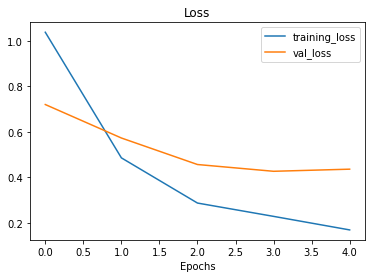

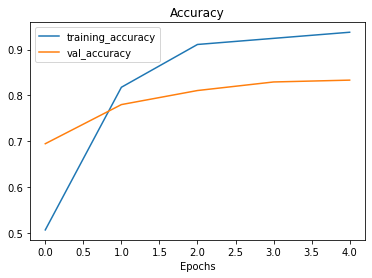

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10.num_classes)

efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data_10,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_10),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20220423-094511
Epoch 1/5
8/8 [==============================] - 16s 947ms/step - loss: 1.0006 - accuracy: 0.5200 - val_loss: 0.8285 - val_accuracy: 0.7280
Epoch 2/5
8/8 [==============================] - 5s 757ms/step - loss: 0.6928 - accuracy: 0.8044 - val_loss: 0.6138 - val_accuracy: 0.8573
Epoch 3/5
8/8 [==============================] - 5s 631ms/step - loss: 0.5017 - accuracy: 0.9111 - val_loss: 0.4874 - val_accuracy: 0.8947
Epoch 4/5
8/8 [==============================] - 5s 632ms/step - loss: 0.3952 - accuracy: 0.9244 - val_loss: 0.4080 - val_accuracy: 0.9120
Epoch 5/5
8/8 [==============================] - 5s 630ms/step - loss: 0.3201 - accuracy: 0.9422 - val_loss: 0.3576 - val_accuracy: 0.9213


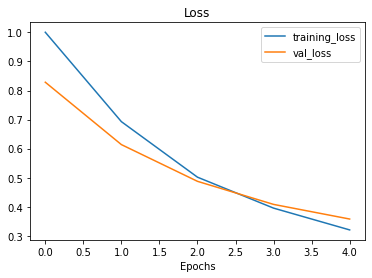

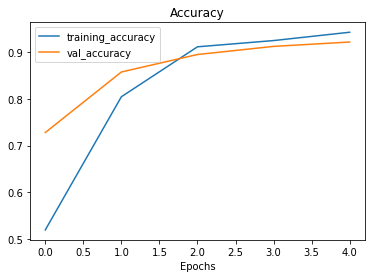

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
resnet_sgd_model = create_model(resnet_url, num_classes=train_data_10.num_classes)

resnet_sgd_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])

resnet_sgd_history = resnet_sgd_model.fit(train_data_10,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_10),
                                          validation_data=test_data,
                                          validation_steps=len(test_data),
                                          callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                experiment_name="resnet50V2SGD")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2SGD/20220423-095819
Epoch 1/5
8/8 [==============================] - 13s 867ms/step - loss: 1.3758 - accuracy: 0.5156 - val_loss: 0.6146 - val_accuracy: 0.7507
Epoch 2/5
8/8 [==============================] - 6s 763ms/step - loss: 1.9337 - accuracy: 0.7111 - val_loss: 0.7043 - val_accuracy: 0.6853
Epoch 3/5
8/8 [==============================] - 5s 728ms/step - loss: 0.3108 - accuracy: 0.9022 - val_loss: 0.6981 - val_accuracy: 0.7267
Epoch 4/5
8/8 [==============================] - 5s 723ms/step - loss: 0.2585 - accuracy: 0.8933 - val_loss: 0.4506 - val_accuracy: 0.8027
Epoch 5/5
8/8 [==============================] - 5s 732ms/step - loss: 0.1881 - accuracy: 0.9333 - val_loss: 0.3985 - val_accuracy: 0.8293


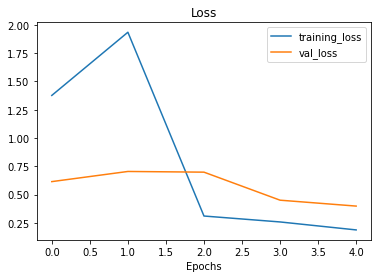

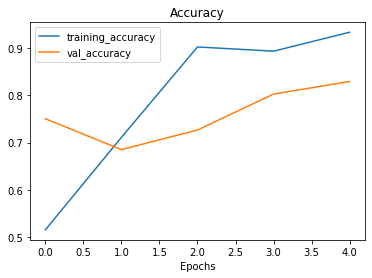

In [ ]:
plot_loss_curves(resnet_sgd_history)

In [ ]:
efficientnet_sgd_model = create_model(model_url=efficientnet_url,
                                      num_classes=train_data_10.num_classes)

efficientnet_sgd_model.compile(loss='categorical_crossentropy',
                                optimizer=tf.keras.optimizers.SGD(),
                                metrics=['accuracy'])

efficientnet_sgd_history = efficientnet_sgd_model.fit(train_data_10,
                                                      epochs=5,
                                                      steps_per_epoch=len(train_data_10),
                                                      validation_data=test_data,
                                                      validation_steps=len(test_data),
                                                      callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnetB0SGD")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0SGD/20220423-100132
Epoch 1/5
8/8 [==============================] - 14s 802ms/step - loss: 0.9751 - accuracy: 0.5422 - val_loss: 0.8705 - val_accuracy: 0.6160
Epoch 2/5
8/8 [==============================] - 5s 629ms/step - loss: 0.7871 - accuracy: 0.7289 - val_loss: 0.7185 - val_accuracy: 0.7600
Epoch 3/5
8/8 [==============================] - 5s 627ms/step - loss: 0.6487 - accuracy: 0.8489 - val_loss: 0.6199 - val_accuracy: 0.8493
Epoch 4/5
8/8 [==============================] - 6s 856ms/step - loss: 0.5689 - accuracy: 0.8711 - val_loss: 0.5592 - val_accuracy: 0.8747
Epoch 5/5
8/8 [==============================] - 5s 630ms/step - loss: 0.4941 - accuracy: 0.9200 - val_loss: 0.5156 - val_accuracy: 0.8773


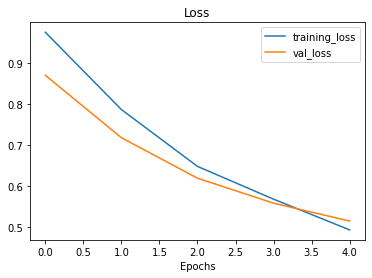

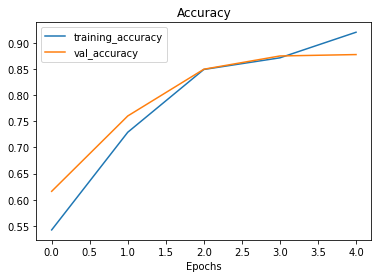

In [ ]:
plot_loss_curves(efficientnet_sgd_history)

In [ ]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(x)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)

resnet_tuning_model = tf.keras.Model(inputs, outputs)

resnet_tuning_model.compile(loss='categorical_crossentropy',
                                  optimizer=tf.keras.optimizers.Adam(),
                                  metrics=["accuracy"])

history_resnet_tuning_1 = resnet_tuning_model.fit(train_data_10,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback("transfer_learning", "resnet_tuning_1")])

Shape after base_model: (None, 7, 7, 2048)
After GlobalAveragePooling2D(): (None, 2048)
Saving TensorBoard log files to: transfer_learning/resnet_tuning_1/20220423-144205
Epoch 1/5
8/8 [==============================] - 9s 720ms/step - loss: 1.1178 - accuracy: 0.2756 - val_loss: 1.1057 - val_accuracy: 0.3177
Epoch 2/5
8/8 [==============================] - 4s 562ms/step - loss: 1.1032 - accuracy: 0.3378 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 3/5
8/8 [==============================] - 3s 407ms/step - loss: 1.0931 - accuracy: 0.3644 - val_loss: 1.0898 - val_accuracy: 0.4010
Epoch 4/5
8/8 [==============================] - 4s 557ms/step - loss: 1.0790 - accuracy: 0.4178 - val_loss: 1.0786 - val_accuracy: 0.3646
Epoch 5/5
8/8 [==============================] - 3s 404ms/step - loss: 1.0808 - accuracy: 0.3333 - val_loss: 1.0867 - val_accuracy: 0.3438


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

resnet_tuning_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

history_resnet_tuning_2 = resnet_tuning_model.fit(train_data_10,
                                               epochs=10,
                                               validation_data=test_data,
                                               initial_epoch=history_resnet_tuning_1.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "efficientnet_tuning_2")])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Saving TensorBoard log files to: transfer_learning/efficientnet_tuning_2/20220423-144449
Epoch 5/10
8/8 [==============================] - 8s 585ms/step - loss: 1.1864 - accuracy: 0.3644 - val_loss: 1.0845 - val_accuracy: 0.3958
Epoch 6/10
8/8 [==============================] - 3s 441ms/step - loss: 1.0801 - accuracy: 0.3467 - val_loss: 1.1136 - val_accuracy: 0.3385
Epoch 7/10
8/8 [==============================] - 4s 570ms/step - loss: 0.9392 - accuracy: 0.5467 - val_loss: 1.0858 - val_accuracy: 0.3906
Epoch 8/10
8/8 [==============================] - 4s 568ms/step - loss: 0.9106 - accuracy: 0.5333 - val_loss: 1.0998 - val_accuracy: 0.3125
Epoch 9/10
8/8 [==============================] - 4s 569ms/step - loss: 0.8732 - accuracy: 0.5822 - val_loss: 1.0905 - val_accuracy: 0.3333
Epoch 10/10
8/8 [==============================] - 4s 570ms/step - loss: 0.8174 - accuracy: 0.6400 - val_loss: 1.0973 - val_accuracy: 0.3385


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)

efficientnet_tuning_model = tf.keras.Model(inputs, outputs)

efficientnet_tuning_model.compile(loss='categorical_crossentropy',
                                  optimizer=tf.keras.optimizers.Adam(),
                                  metrics=["accuracy"])

history_effiсientnet_tuning_1 = efficientnet_tuning_model.fit(train_data_10,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback("transfer_learning", "efficientnet_tuning_1")])

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/efficientnet_tuning_1/20220423-145050
Epoch 1/5
8/8 [==============================] - 12s 605ms/step - loss: 1.1257 - accuracy: 0.3156 - val_loss: 1.1105 - val_accuracy: 0.3333
Epoch 2/5
8/8 [==============================] - 3s 360ms/step - loss: 1.1103 - accuracy: 0.3333 - val_loss: 1.1284 - val_accuracy: 0.2344
Epoch 3/5
8/8 [==============================] - 3s 358ms/step - loss: 1.1088 - accuracy: 0.3378 - val_loss: 1.0989 - val_accuracy: 0.3385
Epoch 4/5
8/8 [==============================] - 4s 533ms/step - loss: 1.1125 - accuracy: 0.3600 - val_loss: 1.1078 - val_accuracy: 0.3229
Epoch 5/5
8/8 [==============================] - 3s 386ms/step - loss: 1.1064 - accuracy: 0.3422 - val_loss: 1.1008 - val_accuracy: 0.3490


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

efficientnet_tuning_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

history_efficientnet_tuning_2 = efficientnet_tuning_model.fit(train_data_10,
                                               epochs=10,
                                               validation_data=test_data,
                                               initial_epoch=history_effiсientnet_tuning_1.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "efficientnet_tuning_2")])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Saving TensorBoard log files to: transfer_learning/efficientnet_tuning_2/20220423-145126
Epoch 5/10
8/8 [==============================] - 13s 780ms/step - loss: 1.1193 - accuracy: 0.3600 - val_loss: 1.1114 - val_accuracy: 0.2969
Epoch 6/10
8/8 [==============================] - 3s 364ms/step - loss: 1.1449 - accuracy: 0.3156 - val_loss: 1.1039 - val_accuracy: 0.3073
Epoch 7/10
8/8 [==============================] - 5s 605ms/step - loss: 1.1258 - accuracy: 0.3467 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 8/10
8/8 [==============================] - 3s 363ms/step - loss: 1.1297 - accuracy: 0.3111 - val_loss: 1.0943 - val_accuracy: 0.3854
Epoch 9/10
8/8 [==============================] - 3s 385ms/step - loss: 1.1011 - accuracy: 0.3289 - val_loss: 1.1034 - val_accuracy: 0.3229
Epoch 10/10
8/8 [==============================] - 4s 561ms/step - loss: 1.0980 - accuracy: 0.3778 - val_loss: 1.1028 - val_accuracy: 0.3698


#Висновок

На лабораторній роботі ми розглянули найбільш корисні для нашої задачі моделі нейронних мереж та спробували власноруч налаштувати їх з використанням різних оптимізаторів